### Unsupervised Machine Learning - Clustering using K-Means

K-Means clustering is an unsupervised learning technique that lacks predefined categories or groups.
The primary objectives of this algorithm is to group similar data points together, with the number of groups determined by the value of K. The algorithm follows an iterative approach and assigns each data point to one of the K groups based on the features that are provided.

In [2]:
# Import required Liberaries
import numpy as np
import pandas as pd 

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, homogeneity_score
from scipy.cluster.hierarchy import dendrogram, linkage


import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\acer\10Alytics\Python Folders\Machine Learning 2\Customers.csv")

In [4]:
data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.shape

(200, 5)

In [6]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
data.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64


<Axes: >

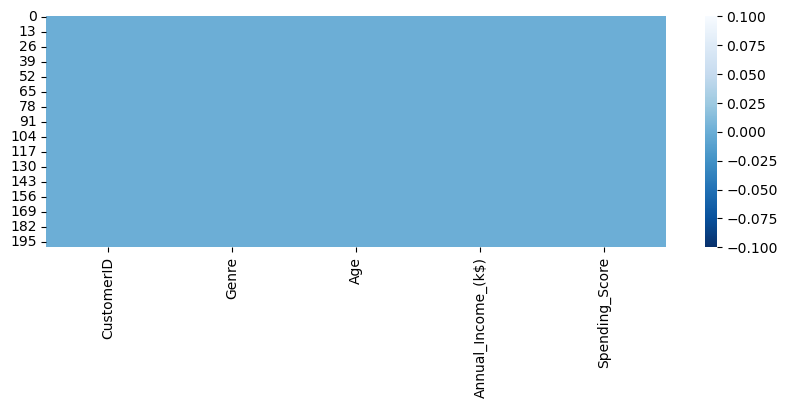

In [14]:
# Checking for missing Values
print(data.isnull().sum())

#Visualizing the missing data
plt.figure(figsize=(10,3))
sns.heatmap(data.isnull(), cmap='Blues_r', cbar=True)

## Data Cleaning and Pre-Processing

In [15]:
# Check for duplicates 
print(data.duplicated().sum())

0


## Exploratory Data Analysis

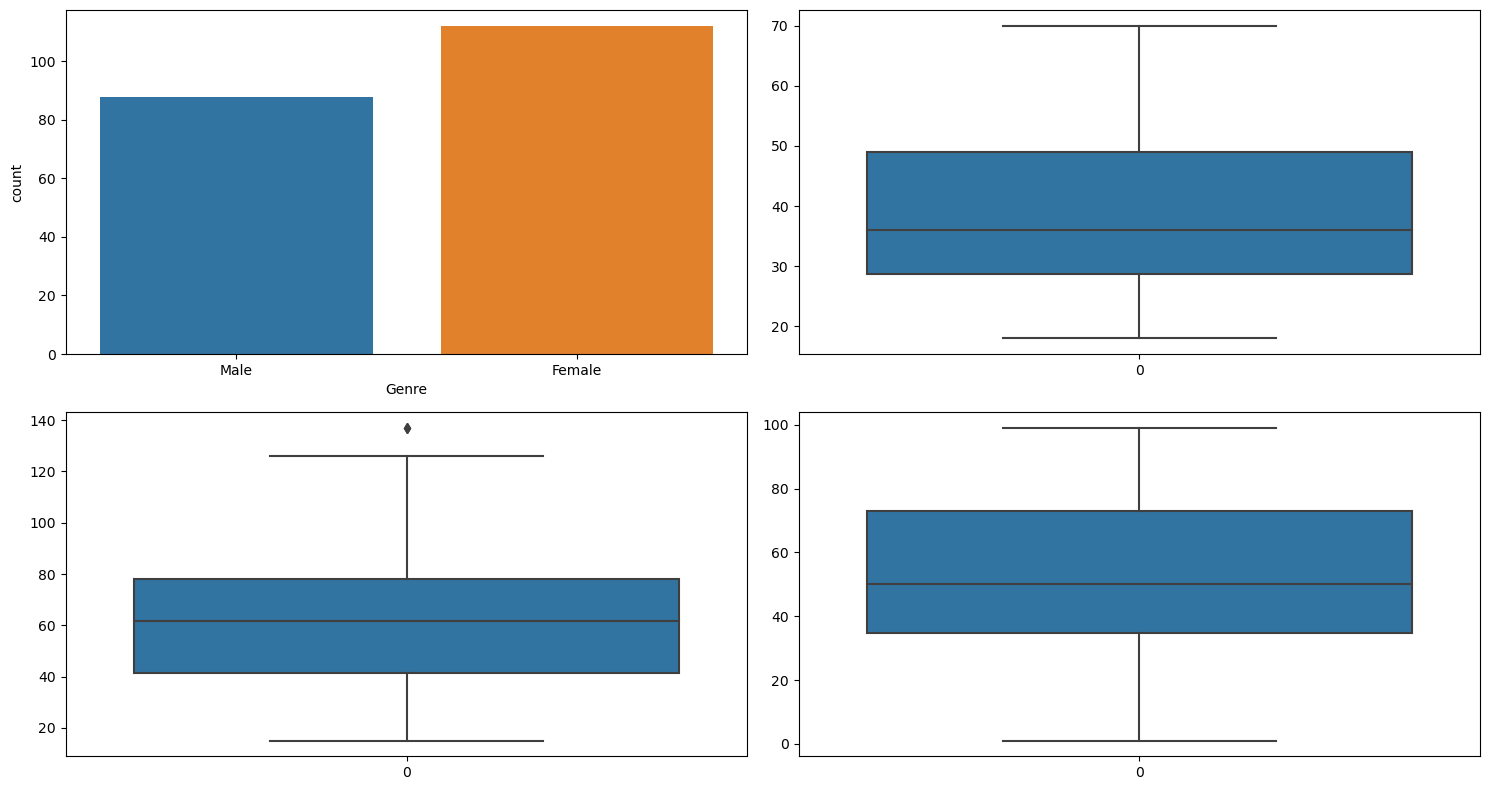

In [30]:

fig, axs = plt.subplots(2, 2, figsize=(15, 8))
plt1 = sns.countplot(x=data['Genre'], ax=axs[0, 0])
plt2 = sns.boxplot(data['Age'], ax=axs[0, 1])
plt3 = sns.boxplot(data['Annual_Income_(k$)'], ax=axs[1, 0])
plt4 = sns.boxplot(data['Spending_Score'], ax=axs[1, 1])
plt.tight_layout()
plt.show()

In [28]:
data.dtypes

CustomerID             int64
Genre                 object
Age                    int64
Annual_Income_(k$)     int64
Spending_Score         int64
dtype: object

In [116]:
# Group Customer Age

def Age_group(x):
    if x <=18:
        return "<=18 Young Adult"
    elif x <=40:
        return "<=19-40 Adult "
    elif x <= 60:
        return "41-60 Old Adult"
    else:
        return ">=61 Elders"
        
    
# Apply function to data

data["Age_group"] = data["Age"].apply(Age_group)
data.head()

,CustomerID,Age,Spending_Score,Gender,Annual_Income,Age_group
0,1,19,39,Male,15,<=19-40 Adult
1,2,21,81,Male,15,<=19-40 Adult
2,3,20,6,Female,16,<=19-40 Adult
3,4,23,77,Female,16,<=19-40 Adult
4,5,31,40,Female,17,<=19-40 Adult


In [65]:
#data ['Gender'] = data['Genre']

data ['Annual_Income'] = data['Annual_Income_(k$)']

In [68]:

data.drop('Annual_Income_(k$)', axis=1, inplace=True)

In [69]:
data.head()

,CustomerID,Age,Spending_Score,Gender,Annual_Income
0,1,19,39,Male,15
1,2,21,81,Male,15
2,3,20,6,Female,16
3,4,23,77,Female,16
4,5,31,40,Female,17


## Bivariate 


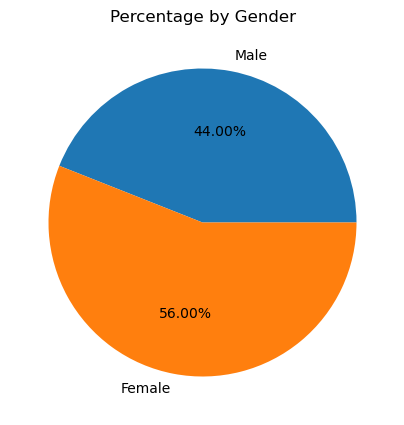

In [49]:
# Total transaction by customer Gender

from collections import Counter

fig,ax = plt.subplots(figsize = (5,5))
count = Counter(data['Gender'])
ax.pie(count.values(), labels=count.keys(),autopct=lambda p:f'{p:.2f}%')
ax.set_title("Percentage by Gender")
plt.show()




### Insights and Observations:

- Visual Immediacy: The pie chart provides an immediate and intuitive understanding of the gender distribution, making it easy to identify the predominant and minority gender categories.
- Percentage Breakdown: The percentage annotations on each slice offer a precise breakdown of the contribution of each gender to the overall dataset.

#### Visualization Impact:
This concise and visually appealing representation is particularly useful for conveying the distribution of categorical variables, such as gender, in a manner that is easy to interpret.
This pie chart serves as a valuable tool for communicating the gender distribution within the dataset, facilitating a quick grasp of the dataset's demographic composition.

In [70]:
data.columns

Index(['CustomerID', 'Age', 'Spending_Score', 'Gender', 'Annual_Income'], dtype='object')

Text(0.5, 1.0, 'Age_group and Spending_Score')

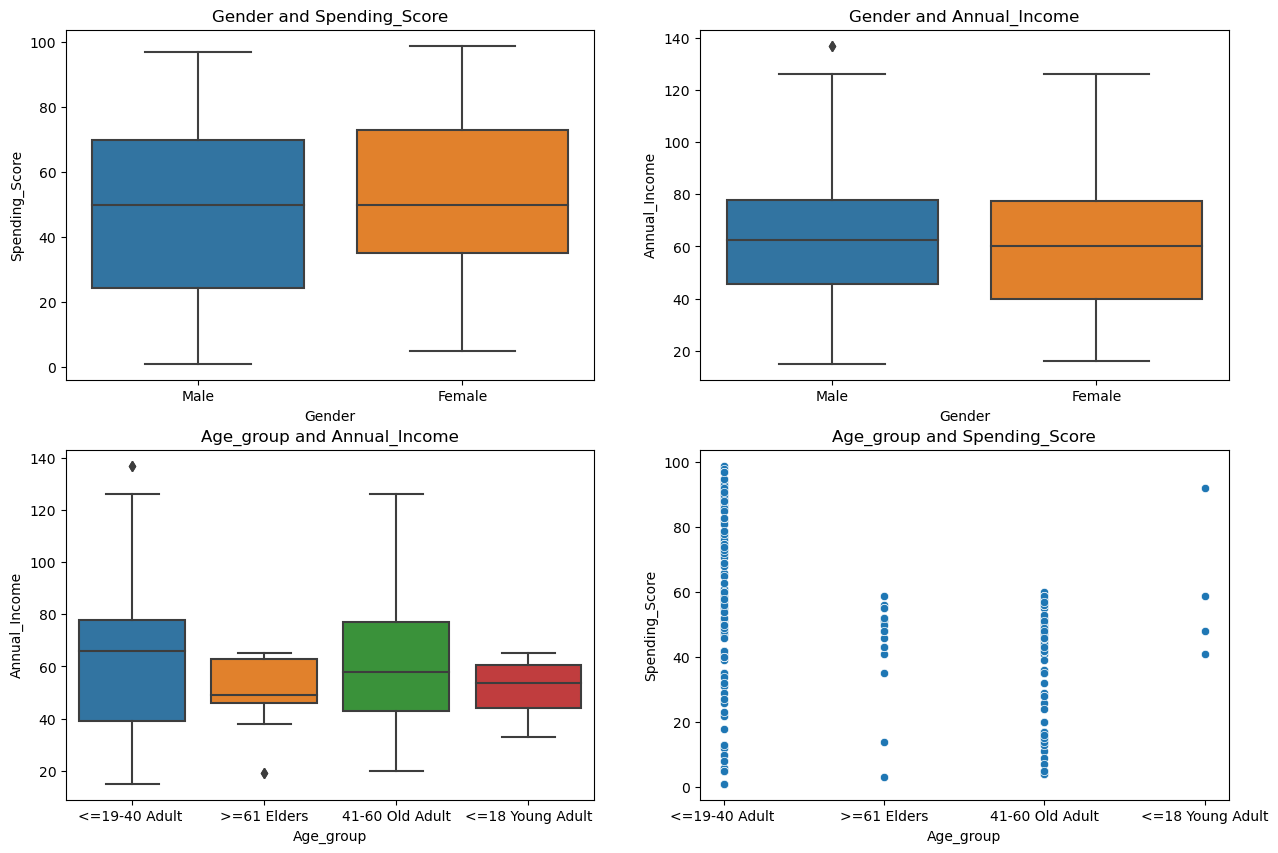

In [117]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
sns.boxplot(x='Gender', y= 'Spending_Score', data=data, ax=axs[0,0])
axs[0,0].set_title('Gender and Spending_Score')

sns.boxplot(x='Gender', y= 'Annual_Income', data=data, ax=axs[0,1])
axs[0,1].set_title('Gender and Annual_Income')

sns.boxplot(x='Age_group', y= 'Annual_Income', data=data, ax=axs[1,0])
axs[1,0].set_title('Age_group and Annual_Income')

sns.scatterplot(x='Age_group', y= 'Spending_Score', data=data, ax=axs[1,1])
axs[1,1].set_title('Age_group and Spending_Score')


### Exploratory Data Analysis:  Insights from Visualizations

####  Understanding Relationships in the Dataset
#### Slide 1: Gender and Spending Score
Utilizing boxplots to investigate the relationship between Gender and Spending Score.
Clear visualization of the distribution of Spending Scores among different genders.
Insight: Identify any patterns or variations in spending behavior based on gender.
####  Slide 2: Gender and Annual Income
Employing boxplots to analyze the association between Gender and Annual Income.
Visual representation of the spread of Annual Income across different genders.
Insight: Explore whether there are gender-based differences in income distribution.
#### Slide 3: Age Group and Annual Income
Boxplots shedding light on the connection between Age Groups and Annual Income.
Understanding how Annual Income varies across different age groups.
Insight: Examine potential correlations between age demographics and income levels.
#### Slide 4: Age Group and Spending Score
Scatterplot revealing the relationship between Age Groups and Spending Scores.
Visualization of spending patterns based on different age demographics.
Insight: Identify any discernible trends or clusters in spending behavior across age groups.
#### Key Takeaways
Diversity in Spending Behavior: Gender-based and age-based insights into spending patterns.
Income Distribution: Understanding how Annual Income is distributed among different demographics.
Data-Driven Decision Making: Visualizations provide a foundation for informed decision-making.

In [75]:
data.dtypes

CustomerID         int64
Age                int64
Spending_Score     int64
Gender            object
Annual_Income      int64
dtype: object

### Multivariate Analysis

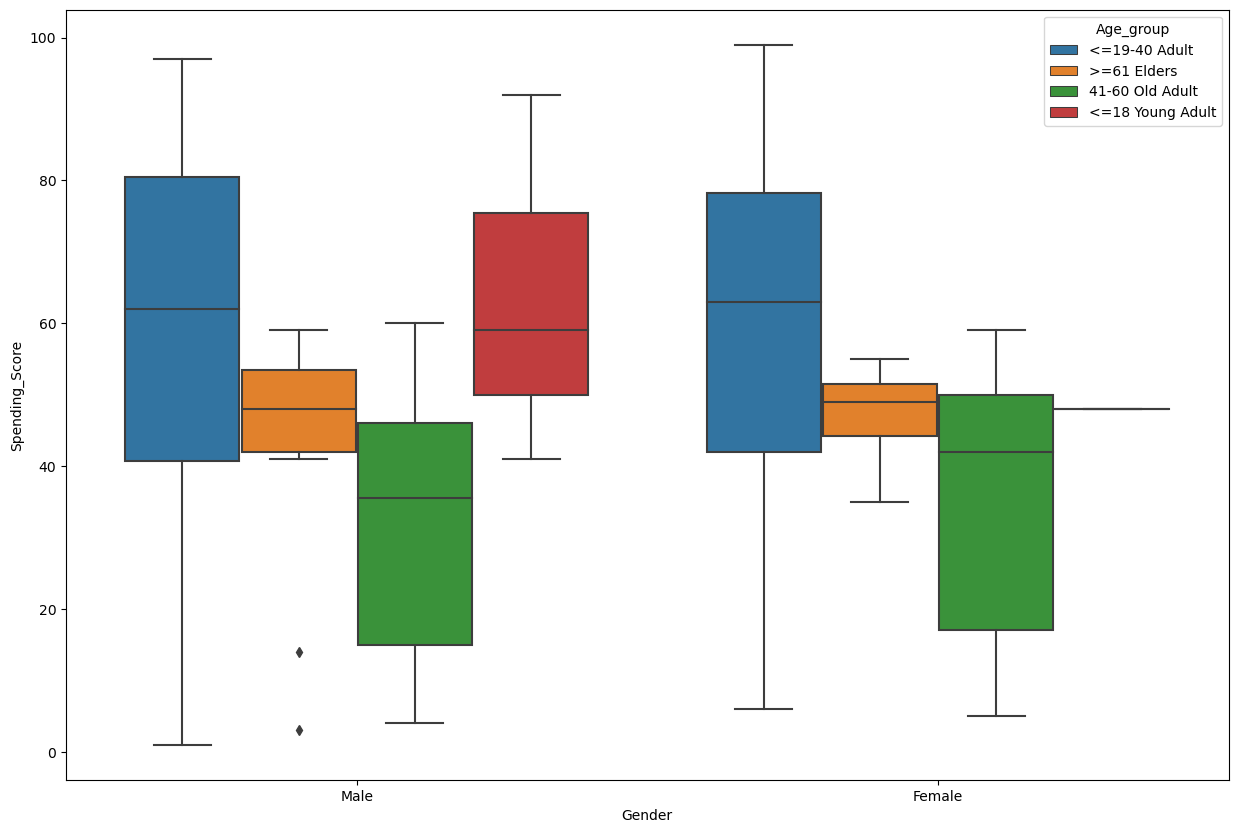

In [123]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Gender', y= 'Spending_Score', hue='Age_group', data=data);

## Insights:
The boxplot illustrates the distribution of spending scores across various age groups for both genders.
We can observe the central tendency, spread, and potential outliers in spending scores for each age group, providing valuable insights into the spending behavior.

### Key Observations:
- Are there noticeable differences in spending scores between genders?
- How does spending behavior vary across different age groups?
- Are there any trends or patterns that stand out in the visualization?


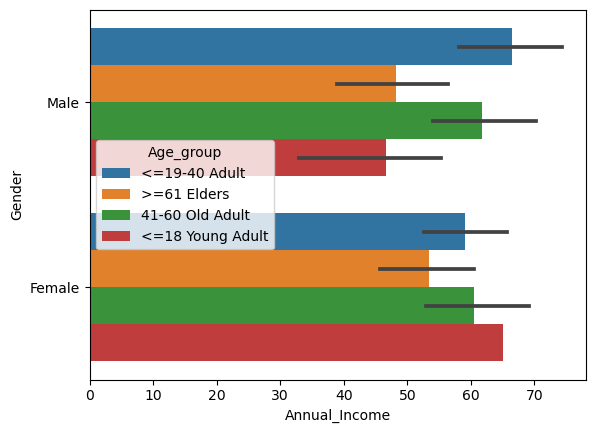

In [130]:

sns.barplot(x='Annual_Income', y='Gender', hue='Age_group',data=data);


### Exploring the Interplay of Annual Income, Gender, and Age Groups

In this visual exploration, we employ Seaborn to generate a bar plot that sheds light on the intricate relationship between annual income, gender, and age groups within the dataset.

#### Insights and Observations:
- Income Disparities: The varying heights of the bars reveal insights into how annual income differs across genders within each age group.

- Age-Dependent Trends: By incorporating age groups through the hue parameter, the plot allows for the identification of age-dependent income trends, contributing to a richer understanding of the data.

#### Visualization Impact:
The bar plot serves as a powerful visual tool to uncover nuanced patterns within the dataset, offering a quick and intuitive grasp of the relationships between annual income, gender, and age.
This visual exploration is instrumental in gaining actionable insights into income distribution patterns and demographic variations, providing a solid foundation for further data analysis and decision-making.



In [136]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
encoder = LabelEncoder() # method initialization

# Looping for Columns except Survived
for c in data.columns[1:]:
    if (data[c].dtype=='object'):
        data[c] = encoder.fit_transform(data[c])
    else:
            data[c] = data[c]
            
data.head()            
            

,CustomerID,Age,Spending_Score,Gender,Annual_Income,Age_group
0,1,19,39,1,15,2
1,2,21,81,1,15,2
2,3,20,6,0,16,2
3,4,23,77,0,16,2
4,5,31,40,0,17,2


In [143]:

data.drop(['CustomerID', 'Age_group'], axis=1, inplace=True)
data.head() 

,Age,Spending_Score,Gender,Annual_Income
0,19,39,1,15
1,21,81,1,15
2,20,6,0,16
3,23,77,0,16
4,31,40,0,17


### Dropping These Columns

- CustomerID: If 'CustomerID' is merely an identifier and lacks predictive value, its removal simplifies the dataset without sacrificing meaningful information.
- Age_group:  On the analysis goals, the 'Age_group' column has been deemed unnecessary, leading to its exclusion.
#### Impact on Analysis:
This feature selection process streamlines the dataset, potentially enhancing computational efficiency and focusing attention on the most relevant features for subsequent analyses.
- By strategically dropping these columns, we optimize the dataset for a more streamlined and targeted exploration, contributing to a more efficient and insightful analytical process.




Elbow Method is a technique used in machine learning for finding the optimal number of clusters in a dataset.
It is commonly applied in clustering algorithms, particularly in K-means clustering.
The basic idea is to run the clustering algorithm for a range of values of k (the number of clusters) 
and plot the cost or distortion as a function of k.
The "elbow" of the plot represents a point where increasing the number of clusters
does not significantly improve the model's fit.
WCSS is a measure of the compactness of clusters in K-means clustering, and it helps in determining the appropriate number of clusters for a given dataset.



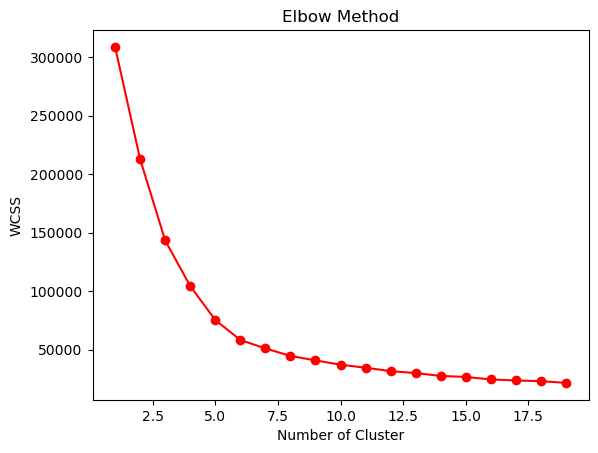

In [156]:
# Determine Optimal Number of Cluster

wcss = []
for i in range (1,20):
    kmeans = KMeans(n_clusters =i, init= 'k-means++', random_state= 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,20),wcss, color='red', marker='o') 
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.title('Elbow Method');


In [157]:
# Fit K-Means Clustering Model

kmeans = KMeans(n_clusters =5, init= 'k-means++', random_state= 42)
kmeans.fit(data)

# Add Cluster Label to Data
data['Cluster']= kmeans.labels_

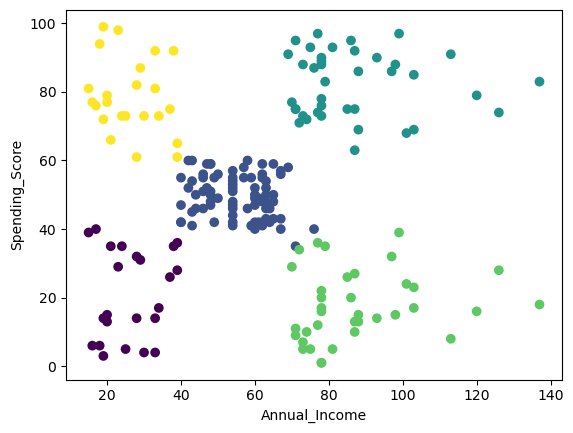

0.44473703994455477

In [161]:
# Visualize cluster results
plt.scatter(data['Annual_Income'], data['Spending_Score'],c= data['Cluster'], label = 'centroids')
plt.xlabel('Annual_Income')
plt.ylabel('Spending_Score')
plt.show()

# Calculate Silhouette Score
from sklearn.metrics import silhouette_score
silhouette_score(data,kmeans.labels_)

### Narration
This scatter plot provides a clear visualization of how the data points are grouped into clusters based on their annual income and spending scores. The distinct colors highlight different clusters, and the centroids are marked for reference.

Next, the code computes the Silhouette Score, a metric used to evaluate the goodness of a clustering technique. The Silhouette Score ranges from -1 to 1, where a higher value indicates better-defined clusters.